# Image Processing 101

Simple examples of image processing concepts on OpenCV. Concepts explored:

* Data structures
* Color and color conversions
* Thresholding and masking
* Blurring
* Contours and bounding rectangles
* Edges
* Hough Transforms

In [2]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Basic data structures in OpenCV

In [3]:
# read an image
img = cv2.imread('images/noguchi02.jpg')

# show image format (basically a 3-d array of pixel color info, in BGR format)
print(img)

[[[ 72  99 143]
  [ 76 103 147]
  [ 78 106 147]
  ..., 
  [159 186 207]
  [160 187 213]
  [157 187 212]]

 [[ 74 101 145]
  [ 77 104 148]
  [ 77 105 146]
  ..., 
  [160 187 208]
  [158 186 210]
  [153 183 208]]

 [[ 76 103 147]
  [ 77 104 148]
  [ 76 104 145]
  ..., 
  [157 181 203]
  [160 188 212]
  [158 186 210]]

 ..., 
 [[ 39  78 130]
  [ 39  78 130]
  [ 40  79 131]
  ..., 
  [193 210 223]
  [195 212 225]
  [197 214 227]]

 [[ 32  71 123]
  [ 32  71 123]
  [ 32  71 123]
  ..., 
  [198 215 228]
  [200 217 230]
  [200 217 230]]

 [[ 39  78 130]
  [ 39  78 130]
  [ 39  78 130]
  ..., 
  [199 216 229]
  [200 217 230]
  [201 218 231]]]


### Colors and color conversions

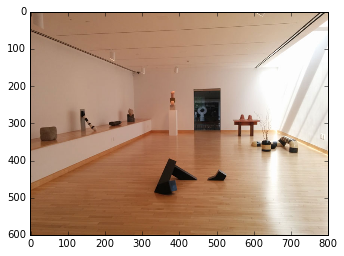

In [4]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.imshow(img)

In [5]:
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
print(gray_img)

[[109 113 115 ..., 189 192 191]
 [111 114 114 ..., 190 190 187]
 [113 114 113 ..., 185 192 190]
 ..., 
 [ 89  89  90 ..., 212 214 216]
 [ 82  82  82 ..., 217 219 219]
 [ 89  89  89 ..., 218 219 220]]


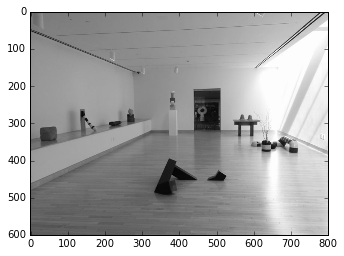

In [6]:
# have to convert grayscale back to RGB for plt.imshow()
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB))

### Finding the average color of an image

In [7]:
# find average per row
# np.average() takes in an axis argument which finds the average across that axis. 
average_color_per_row = np.average(img, axis=0)

# find average across average per row
average_color = np.average(average_color_per_row, axis=0)

# convert back to uint8
average_color = np.uint8(average_color)
print(average_color)


[179 146 123]


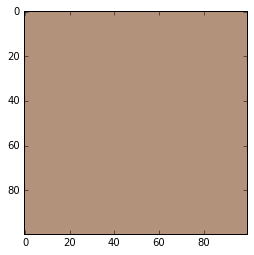

In [8]:
# create 100 x 100 pixel array with average color value
average_color_img = np.array([[average_color]*100]*100, np.uint8)

plt.imshow(average_color_img)

---

## Binary thresholding

Examples using thresholding on brightness/darkness of grayscale image and on color ranges


### Binary thresholding on grayscale image

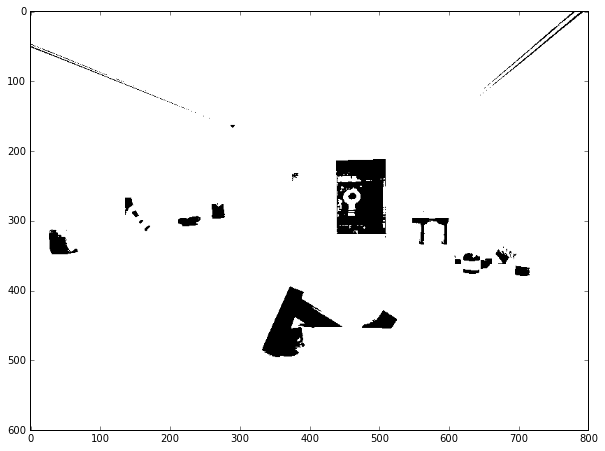

In [9]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

### Binary thresholding on color

In [10]:
# open new Mondrian Piet painting photo
piet = cv2.imread('images/piet.png')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)

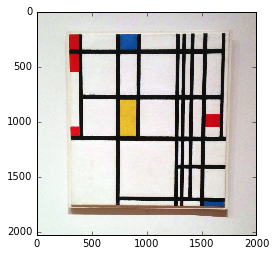

In [11]:
plt.imshow(cv2.cvtColor(piet, cv2.COLOR_BGR2RGB))

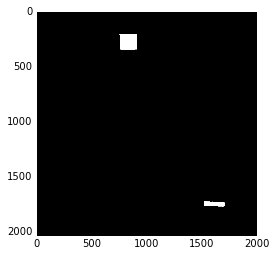

In [12]:
# threshold for hue channel in blue range
blue_min = np.array([85, 60, 60], np.uint8)
blue_max = np.array([150, 255, 255], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

# show threshold bits
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2BGR)
plt.imshow(threshold_blue_img)

### Using binary thresholding to obtain an image mask

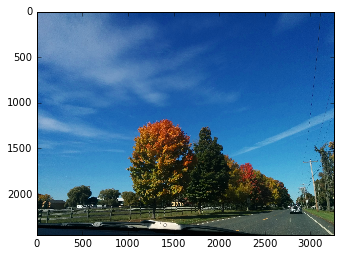

In [13]:
upstate = cv2.imread('images/upstate-ny.jpg')
upstate = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(upstate, cv2.COLOR_HSV2RGB))

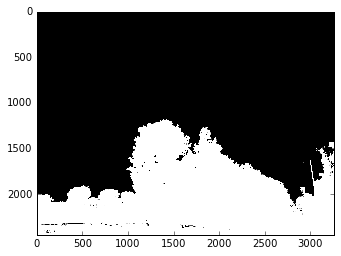

In [14]:
mask_inverse = cv2.inRange(upstate, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))

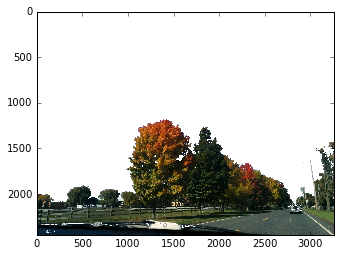

In [15]:
masked_upstate = cv2.bitwise_and(upstate, upstate, mask=mask)
masked_replace_white = cv2.addWeighted(cv2.cvtColor(upstate, cv2.COLOR_HSV2BGR), 1, cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2BGR), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

---

## Gaussian Blur

Gaussian blurring in action, and how it makes a difference in the binary image that it produces

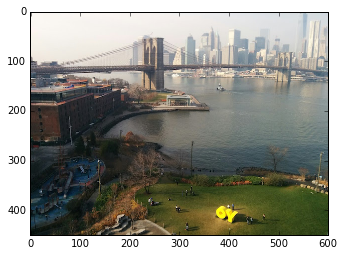

In [16]:
img = cv2.imread('images/oy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


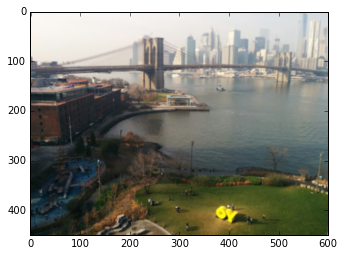

In [17]:
# preproccess with blurring, with 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
cv2.imwrite('output/oy-gaussian-blur-5.jpg', img_blur_small)
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

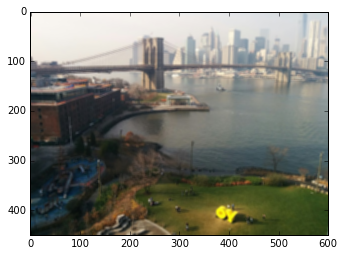

In [18]:
img_blur_small = cv2.GaussianBlur(img, (5,5), 25)
cv2.imwrite('output/oy-gaussian-blur-5-3.jpg', img_blur_small)
plt.imshow(cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB))

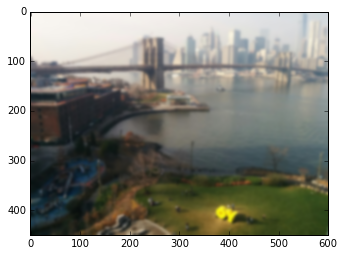

In [19]:
img_blur_large = cv2.GaussianBlur(img, (15,15), 0)
cv2.imwrite('output/oy-gaussian-blur-15.jpg', img_blur_large)
plt.imshow(cv2.cvtColor(img_blur_large, cv2.COLOR_BGR2RGB))

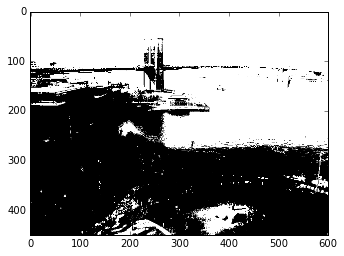

In [20]:
# threshold on regular image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/oy-no-blur-thresh.jpg', threshold_img)

plt.imshow(cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB))

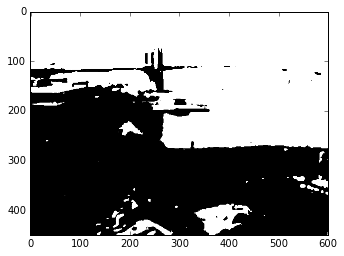

In [21]:
#threshold on blurred image
gray_blur_img = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2GRAY)
_, threshold_img_blur = cv2.threshold(gray_blur_img, 100, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/oy-gaussian-blur-5-thresh.jpg', threshold_img_blur)
plt.imshow(cv2.cvtColor(threshold_img_blur, cv2.COLOR_GRAY2RGB))

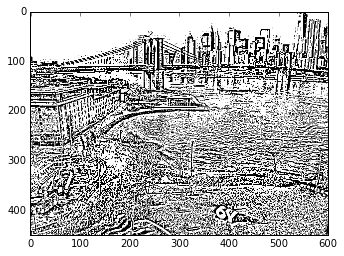

In [22]:
# using adaptive threshold instead of global
adaptive_thresh = cv2.adaptiveThreshold(gray_img,255,\
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                         cv2.THRESH_BINARY,11,2)
plt.imshow(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2RGB))

---

## Contour and bounding boxes

True

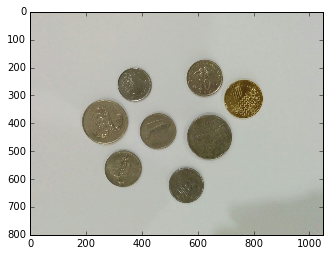

In [23]:
coins = cv2.imread('images/coins.jpg')
plt.imshow(cv2.cvtColor(coins, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-orig.jpg', coins)

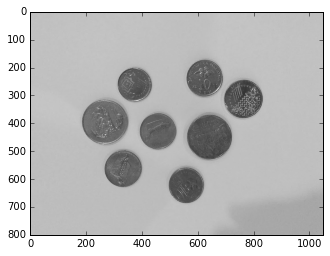

In [24]:
# get binary image and apply Gaussian blur
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

plt.imshow(cv2.cvtColor(coins_preprocessed, cv2.COLOR_GRAY2RGB))

True

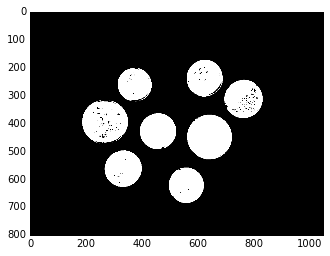

In [25]:
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/coins-binary.png', coins_binary)

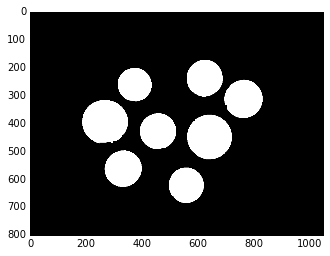

In [26]:
# morph coins by eroding and dilating to remove noise
morph_kernel = np.ones((15,15),np.uint8)
coins_morph = cv2.morphologyEx(coins_binary, cv2.MORPH_CLOSE, morph_kernel)

plt.imshow(cv2.cvtColor(coins_morph, cv2.COLOR_GRAY2RGB))

---
### Get countours

In [36]:
# find contours
coins_contours, _, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-contour.jpg', coins_and_contours)

# print number of contours
print('number of coins: %d' % len(large_contours))

error: /opt/opencv-3.1.0/modules/imgproc/src/shapedescr.cpp:314: error: (-215) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function contourArea


### Find bounding boxes

In [28]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/coins-bounding.jpg', bounding_img)

NameError: name 'large_contours' is not defined

## Edge detection
Canny edge detector on OpenCV. Usage of edge detection versus thresholding to obtain binary image.

True

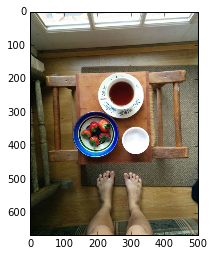

In [29]:
cups = cv2.imread('images/cups.jpg')
plt.imshow(cv2.cvtColor(cups, cv2.COLOR_BGR2RGB))
cv2.imwrite('output/cups-orig.jpg', cups)

In [30]:
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)

True

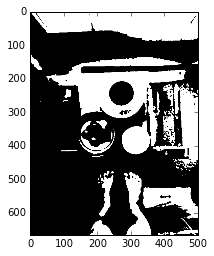

In [31]:
# find binary image with thresholding
low_thresh = 120
high_thresh = 200
_, cups_thresh = cv2.threshold(cups_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-thresh-low.png', cups_thresh)

_, cups_thresh_hi = cv2.threshold(cups_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
cv2.imwrite('output/cups-thresh-hi.png', cups_thresh_hi)

True

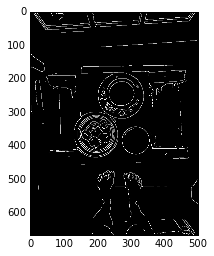

In [32]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('output/cups-edges.png', cups_edges)

---

## Hough Transform 

Example of using cv2.HoughCircles and cv2.HoughLines to detect circles and lines on an image

number of circles detected: 3


True

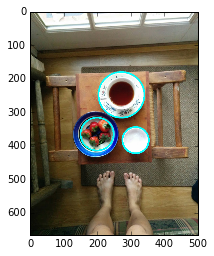

In [35]:
# find hough circles
circles = cv2.HoughCircles(cups_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)

# if circles are detected, draw them
if circles is not None and len(circles) > 0:
    for (x, y, r) in circles[0]:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))

print('number of circles detected: %d' % len(circles[0]))
cv2.imwrite('output/cups-circles.jpg', cups)

In [ ]:
print('The end!')